# Titanic EDA Notebook

This notebook is dedicated to exploratory data analysis (EDA) on the Titanic dataset.  
Note: Preprocessing functions (scaling, encoding, etc.) are defined in `data_processing.py` and `processed.py`.  
Here we mainly focus on data exploration, visualization, and feature understanding.


In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# add project root to sys.path so imports work
sys.path.append(os.path.abspath(".."))

#import functions
from src.data_preprocessing import clean_data, feature_engineering, min_max_scale, one_hot_encode

# (Optional) stats tests
from statsmodels.tsa.stattools import adfuller

In [2]:
# ================================
# 2. Load Raw Data
# ================================
df = pd.read_excel("../data/raw.xlsx")  # adjust path if needed
df.head()
print("Shape of dataset:", df.shape)
df.info()
df.describe()
df.isnull().sum()

print("df columns: ",df.columns)

Shape of dataset: (501, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          501 non-null    datetime64[ns]
 1   Open          501 non-null    float64       
 2   High          501 non-null    float64       
 3   Low           501 non-null    float64       
 4   Close         501 non-null    float64       
 5   Volume        501 non-null    int64         
 6   Dividends     501 non-null    float64       
 7   Stock Splits  501 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 31.4 KB
df columns:  Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [3]:
# ================================
# 3. Data Cleaning & Exploration
# ================================
df = clean_data(df)


#print("df columns: ",df.columns)
# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check duplicates
print("Duplicates:", df.duplicated().sum())


print("df columns: ",df.columns)

Missing values per column:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Duplicates: 0
df columns:  Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


c:\Users\laith\Stock-forecast\src\data_preprocessing.py:84: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")  # forward fill missing values


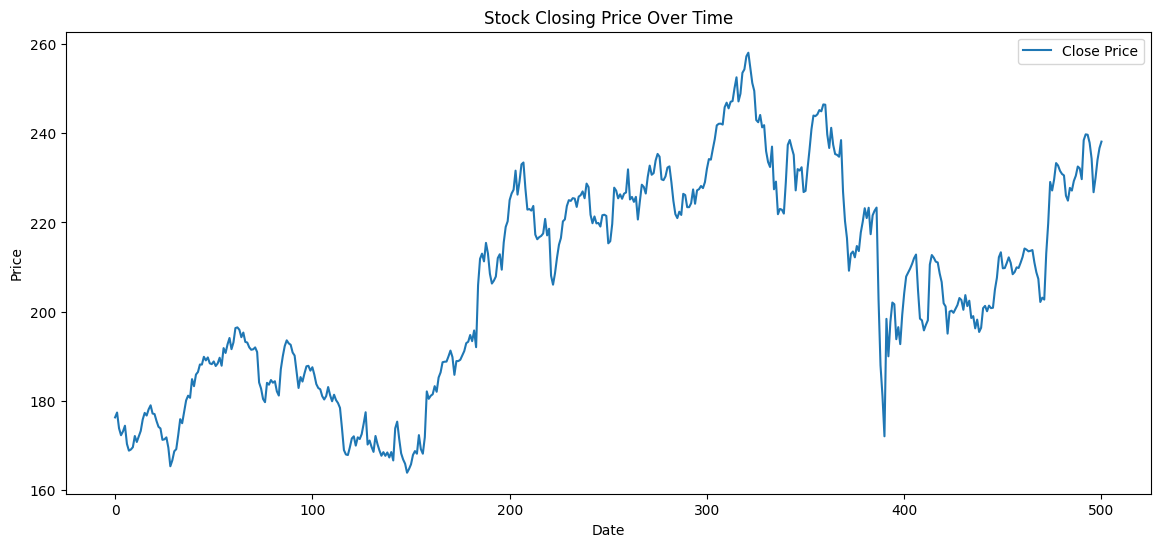

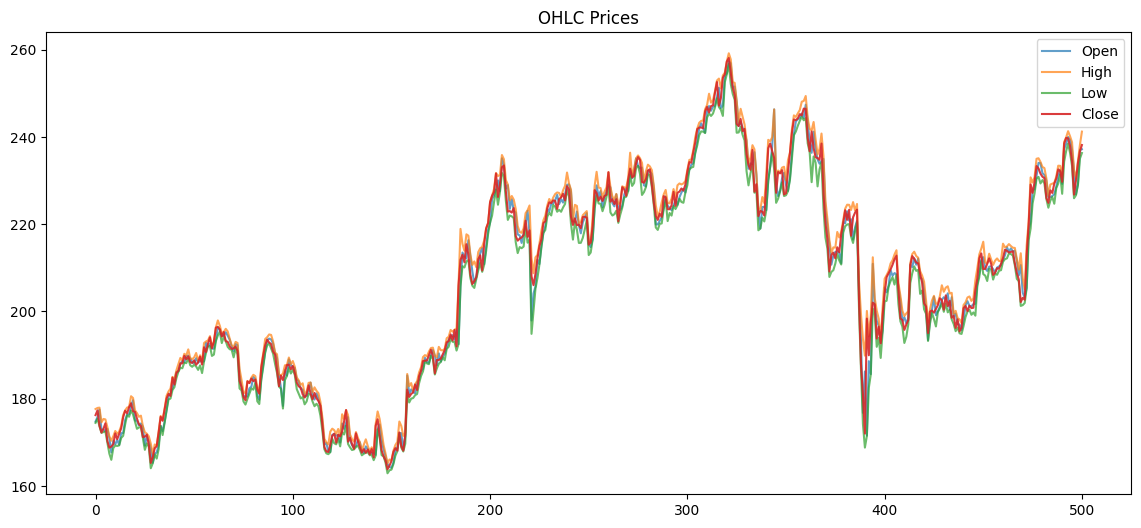

In [4]:
# ================================
# 4. Visualize OHLC Data
# ================================
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], label="Close Price")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Candlestick-like OHLC exploration (optional)
plt.figure(figsize=(14,6))
plt.plot(df['Open'], label='Open', alpha=0.7)
plt.plot(df['High'], label='High', alpha=0.7)
plt.plot(df['Low'], label='Low', alpha=0.7)
plt.plot(df['Close'], label='Close', alpha=0.9)
plt.title("OHLC Prices")
plt.legend()
plt.show()



In [5]:
# ================================
# 5. Feature Engineering Exploration
# ================================
df = feature_engineering(df)
#print("df columns: ",df.columns)


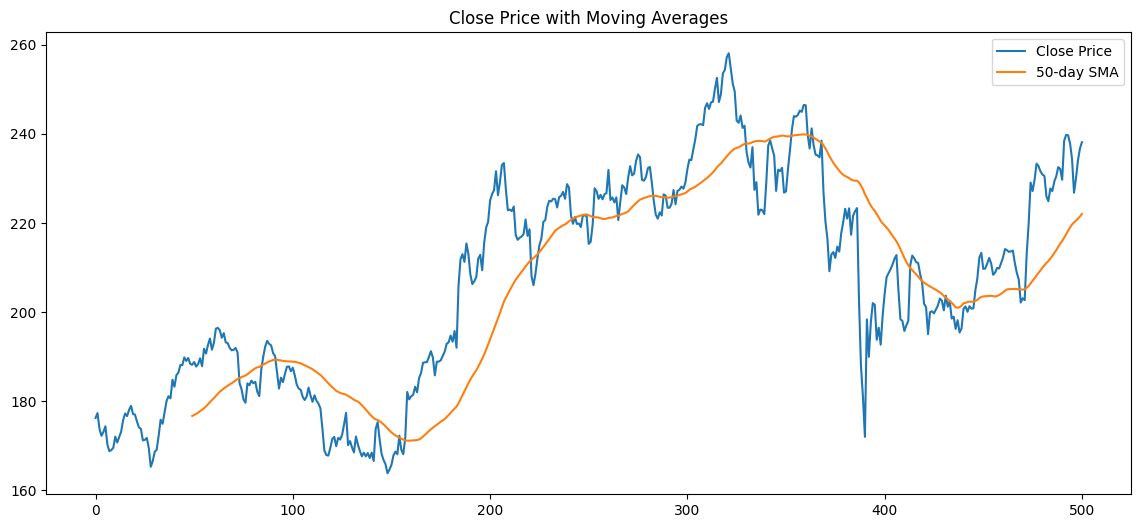

In [6]:
# Example: Moving Averages
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label="Close Price")
if 'SMA_20' in df.columns:
    plt.plot(df['SMA_20'], label="20-day SMA")
if 'SMA_50' in df.columns:
    plt.plot(df['SMA_50'], label="50-day SMA")
plt.title("Close Price with Moving Averages")
plt.legend()
plt.show()

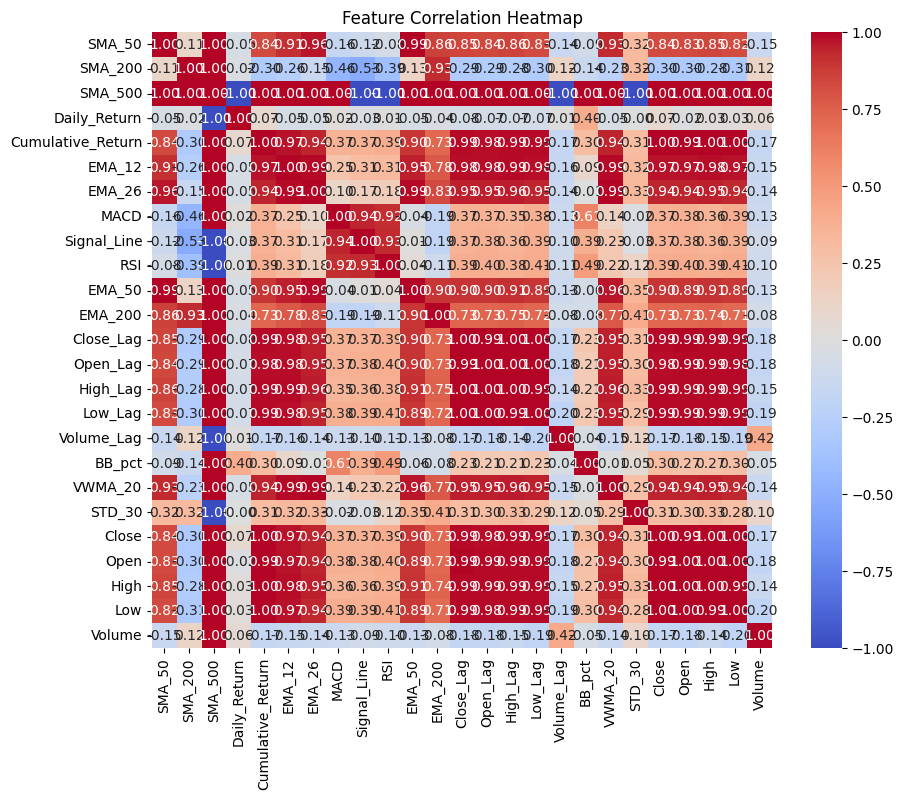

In [7]:
# ================================
# 6. Correlation Heatmap
# ================================
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
# ================================
# 7. Stationarity Check
# ================================
# ADF Test for Close Price
result = adfuller(df['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] < 0.05:
    print("✅ The series is stationary")
else:
    print("⚠️ The series is non-stationary (consider differencing or log returns)")

ADF Statistic: -1.844695
p-value: 0.358508
⚠️ The series is non-stationary (consider differencing or log returns)


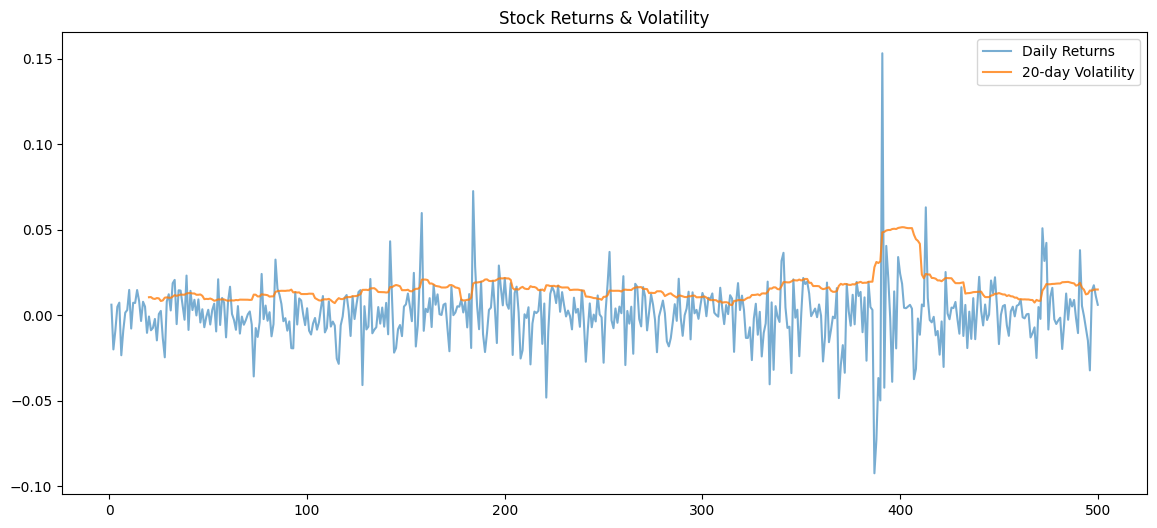

In [9]:
# ================================
# 8. Volatility & Returns
# ================================
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=20).std()

plt.figure(figsize=(14,6))
plt.plot(df['Returns'], label="Daily Returns", alpha=0.6)
plt.plot(df['Volatility'], label="20-day Volatility", alpha=0.8)
plt.title("Stock Returns & Volatility")
plt.legend()
plt.show()